In [0]:
# import packages
import matplotlib
import matplotlib.pyplot as plt
import pylab as PL
import random as RD
import scipy as SP
import numpy as np
RD.seed(2020)

# setting color scheme for latter use
coloring = ["red", "green", "blue", "yellow"]

## **1. Single Lane**

### **1.1. Simulation model**

In [0]:
class TrafficSimulator(object):

  # initilize the parameters 
  def __init__(self, length=100, density=0.1, v_max=5, p_down=0.5, interactive=False):
    self.interactive = interactive
    self.length = length
    self.density = density
    self.v_max = v_max
    self.p_down = p_down

    # Arrays for storing the current state and the next state (when we are
    # busy doing a state update).
    self.current_state = np.zeros(self.length)
    self.next_state = np.zeros(self.length)

  # setting the 1st state of the road
  def initialize(self):
    '''
    This will be called by the interactive pycxsimulator whenever the Reset
    button is clicked.
    '''
    # Set up a random initial state where the fraction of 1s in the array
    # equals the density parameter.
    self.current_state.fill(-1)

    # setting the cars
    for x in range(self.length):
      if RD.random() < self.density:
        # each car has initial speed from 1 to v_max
        state = RD.randint(1, self.v_max)
        self.current_state[x] = state

    self.time = 0

  # display using string type
  def display(self):
    print(''.join('·' if x == -1 else str(int(x)) for x in self.current_state))

  # one step running the similation
  def step(self):
      '''
      Update the state of the cellular automaton.
      '''
      n = self.length

      # initialize next state
      self.next_state = np.zeros(self.length)
      self.next_state.fill(-1)

      # loop through all cars
      for i in range(self.length):

        # only consider non-empty cells
        if self.current_state[i] != -1:
          v = int(self.current_state[i])

          # checking if we have space to accelerate
          for k in range(1, min(v + 1, self.v_max) + 1):
            # this is the maximum speed we can reach: min(v+1, v_max)
            current_v = min(v + 1, self.v_max)
            # if there is obstacle: other cars
            if self.current_state[(i+k)%n] != -1:
              #new max_speed
              current_v = k-1
              break

          # randomization in slowing down
          if RD.random() < self.p_down and current_v > 0:
            current_v -= 1
          
          # updating the next state
          self.next_state[(i + current_v)%n] = current_v
      
      # swapping to update the whole current_state
      self.current_state, self.next_state = self.next_state, self.current_state
      self.time += 1

  # number of cars pass the last bar:
  def car_pass(self):
    for i in range(self.v_max):
      # if there is a car and has speed > current position -> it must have cross the last bar
      if self.current_state[i] != -1 and self.current_state[i] > i:
        return True
    return False

  def check_density(self, value=None):
    '''
    The density of cars on the road. Only affects initialization (reset) of
    the simulation. The density must be a value between 0 and 1.
    '''
    return np.mean(self.current_state != -1)

### **1.2. Check if the model runs by showing states of this model over time and checking the density over time**

We allow the model to run for 970 steps to avoid the effect of random initialization. 

After visualizing the states over time (below) and with three density levels: 0.6, 0.35, 0.5, we see small cluster at low densities, and more prominent clusters in high densities settings, which is because of the velocity fluctuation of the cars. We can see that vehicles coming from the left can comes with peed = 4 or 5 but then has to stop due to congestion. The cars can only get out of traffic jams if the there are no more cars in front of it --> create a backward traveling wave in the road --> traffic jam moves backward as we can see from the figures

2·4452·24254·3·5·52524152·3···5··4·1·5···135··23·355··4··14··2113354451342·135··5454···5·5··1····3·2
0000000000000000000·1·100·1···1000·0··1··10···0·10·1·00···2···00·0·000····2····1·1·000·1·1000·1000·0
000000000000000000·10·000···2·000·1·1··1·00···0·0·10·0·1·····30·1·100·1······3··1·100·10·0000·0000·0
000000000000000000·00·00·1··0·000··1·1··100···0·0·0·1·1··2···00··100·1··2······20·000·0·1000·10000·0
000000000000000000·00·0·1·1·0·00·1·0···200·1··0·0··10···2···300··000···2···3···00·000·0·000·10000·10
00000000000000000·10·10··1·1·100··10···000··1·0·0··00·····2·000··00·1····2····30·100·1·1000·0000·100
0000000000000000·100·00··0·0·000··00···000···1·1·1·00·····0·000··00··1······3·00·000·0·0000·0000·000
0000000000000000·00·100··0··100·1·00···000····10··10·1····0·00·1·0·1···2····0·0·100·10·000·1000·1000
000000000000000·10·100·1··1·00·1·10·1··00·1···00··00··1····100··10···2····3··10·00·100·00·1000·10000
000000000000000·0·100·1·1·0·00·0·00··1·0·1··2·0·1·00····2··000··0·1····2····20·100·00·100·0

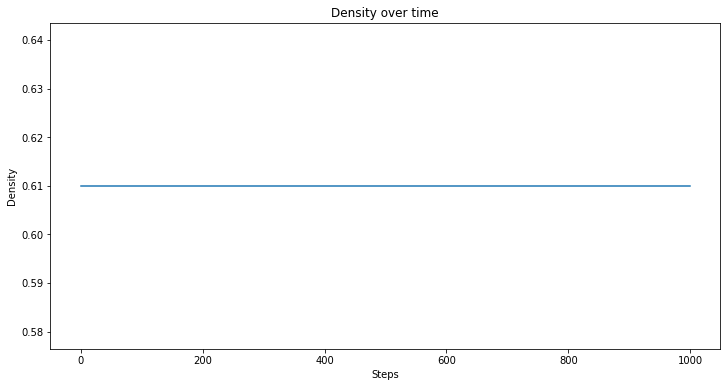

In [3]:
sim = TrafficSimulator(length=100, density=0.65, v_max=5, p_down=0.5)

# run 1000 times to check if any cars went missing
t = 1000
sim.initialize()
sim.display()
# record the density over time
density = []

for i in range(t):
  sim.step()
  if i >= 970:
    sim.display()
  density.append(sim.check_density())

# plot
plt.figure(figsize = (12,6))
plt.title("Density over time")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.plot(range(t), density)
plt.show()

····2···1····5······2····22·41········4·········3·1···2···34·145·····23·15·2·····5···4············41
····4··········5·······················5······10·1·10000000000000··1·1········2···1··1·····2········
········4···········5······················4··0·1·100000000000000···1··2········2··1··1······2······
············4············5··················1··10·000000000000000·····2··2········2·1···2······2····
················4············4················20·100000000000000·1······2··2·······1··2···2·······3·
··4·················4·············5···········0·1000000000000000···2······2··2·······2··2···2·······
·······5·················5············4········10000000000000000······3····1····3·····1···2···2·····
············5·················5···········4····0000000000000000·1·········4··2······4···2····3···3··
3···············4·················4··········3·000000000000000·1·1·········1···2······2····3····3···
···3················4·················4······0·00000000000000·1·1··2········1·····3·····2··

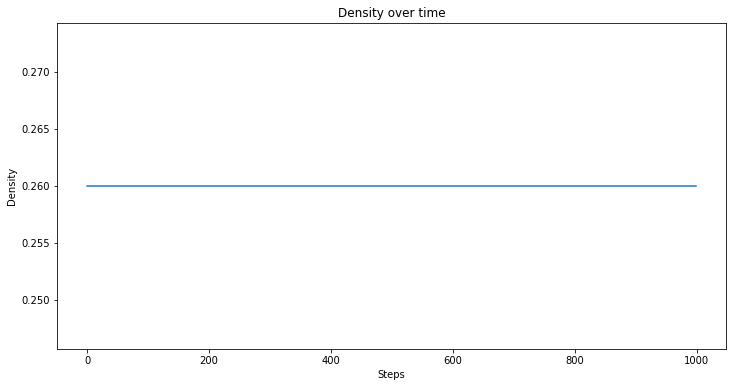

In [4]:
sim = TrafficSimulator(length=100, density=0.35, v_max=5, p_down=0.5)

# run 1000 times to check if any cars went missing
t = 1000
sim.initialize()
sim.display()
# record the density over time
density = []

for i in range(t):
  sim.step()
  if i >= 970:
    sim.display()
  density.append(sim.check_density())

# plot
plt.figure(figsize = (12,6))
plt.title("Density over time")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.plot(range(t), density)
plt.show()

2···3·4···33·5554·25···425·1····4···4··5·3··133213·1·411··234··42··4······2···431·3··3···4·34····511
·0000·0·0000·0·10·1·1·10·000·0·1··100·1·10000·····2····2·····3·············5······00·0·0000000·1··20
1000·10·000·10·0·10··100·000·0···2000·0·0000·1·······3···2·······4··············5·00··1000000·1··20·
0000·00·00·100·0·00··00·100·10···0000··1000·1··2·······2···2··········5·········0·0·1·0000000··1·0·1
0000·0·10·100·10·0·1·00·000·00···000·1·0000···2··2········3···3············5·····1·10·0000000··0··10
0000·0·00·00·10·1·1·100·000·00···00·10·000·1····2··2········2·····4·············50·00·000000·1··1·00
000·10·0·10·100·0·0·00·1000·00···00·0·1000···2····2··2·········3·······5········00·0·100000·1·1·0·00
00·100·0·0·100·10··100·000·100···00·0·0000······3··1···2··········3········4····00··100000·10·0··100
00·00·1·10·00·100··00·1000·000···00·0·0000········2··2···2···········3·········40·1·00000·100·0··000
0·10·10·0·100·000··0·1000·1000···0·10·000·1·········2··2····3···········3······0·10·0000·10

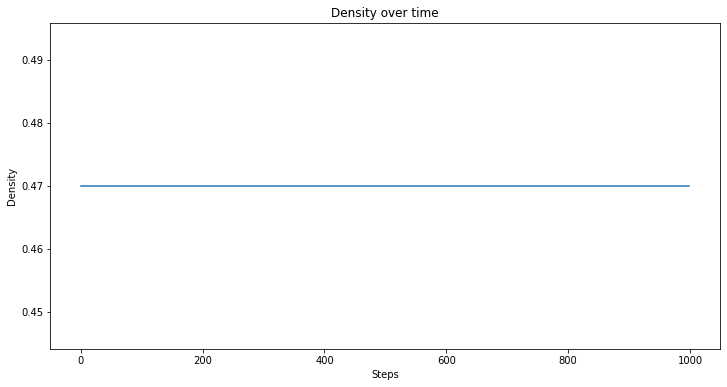

In [5]:
sim = TrafficSimulator(length=100, density=0.5, v_max=5, p_down=0.5)

# run 1000 times to check if any cars went missing
t = 1000
sim.initialize()
sim.display()
# record the density over time
density = []

for i in range(t):
  sim.step()
  if i >= 970:
    sim.display()
  density.append(sim.check_density())

# plot
plt.figure(figsize = (12,6))
plt.title("Density over time")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.plot(range(t), density)
plt.show()

### **1.3. Average car flow with respect to density**

I use the average car flow levels to evaluate the traffic: number of cars passing through the last bar (the end of the road) per time step to compare different scenarios. I run the model for 100 initializing steps to avoid possible effects of random initialization. Then, I record the steps for 200 steps, with 50 different initial configurations. 

The result is shown in the graph below. As we can see, the car flow amount increases linearly from 0 to 0.1. This result is because the density is low, which makes all cars flow freely. However, as we see the peak at 0.1 and then a decrease from there (from 0.1 to 1), this result is due to traffic jams when the density is high enough and velocity differences between cars. The 95% interval for the peak is especially more significant because of the high dependency on the initial random configuration. For other regions, the 95% interval is smaller because the patterns are more set: flow freely if low density and traffic jams if high density. 

In [0]:
# empty list to record results
track_mean, track_low, track_high = [], [], []

# seting the density levels
densities = np.linspace(0, 1, 41)

# initializing steps to avoid the effect of random initialization
init_steps = 100
steps = 200
simulations = 50

for p in densities:
  # set the simulation
  sim = TrafficSimulator(length=100, density = p, v_max = 5, p_down = 0.5)
  tracking = []
  for i in range(simulations):
    total = 0
    sim.initialize()
    # running simulations
    for i in range(steps + init_steps):
      sim.step()
      # only record values after the init_steps to avoid effects of random initialization
      if i >= init_steps:
        total += sim.car_pass()
      # get average number
    tracking.append(total/steps)
  # attach to the list
  track_mean.append(np.mean(tracking))
  track_low.append(np.quantile(tracking, 0.05))
  track_high.append(np.quantile(tracking, 0.95))

peak at: p = 0.125


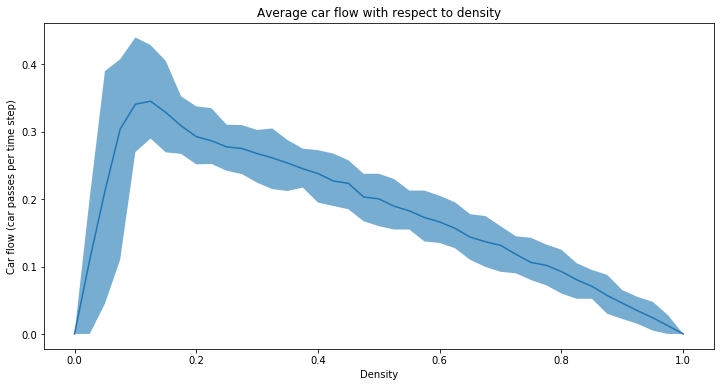

In [7]:
print("peak at: p =", densities[track_mean.index(max(track_mean))])
# Plotting the results
plt.figure(figsize = (12,6))
plt.plot(densities, track_mean)
plt.fill_between(densities, track_low, track_high, alpha=0.6)

# store it to new variables to compare later on
single_lane_mean, single_lane_low, single_lane_high = track_mean, track_low, track_high

plt.title("Average car flow with respect to density")
plt.xlabel("Density")
plt.ylabel("Car flow (car passes per time step)")
plt.show()

## **2. Multi lanes (standard model)**

### **2.1. Simulation model**

optimal: when cars can reach the max_speed or able to accelerate

Multi-lanes model rules: 
- First, avoid changing lanes: only change lanes when the optimal scenarios (max achievable speed) are not on the same lane but can occur by changing to the next lane. Function: look_ahead_same: check what is the optimal speed cars can move in the same lane and if it is optimal. 
- Second, when changing lanes: only change if the optimal scenarios are reached (reach max_speed or can accelerate). Function: look_ahead_other:  check what is the optimal speed cars can move in the other lane and if it is optimal.
- Also, with checking if cars can speed up: also check the obstacles behind to make sure we do not block any cars. Function: look_behind_other: check v_max blocks behind to make sure that the behind path is empty. Or else a crash could happen.
- Third, cars prefer left lanes over right: hence, if we can change to both lanes, prefer the left one. 
- Finally, there is a probability of changing lanes and slowing down, apply to the speed at any given step. 

The flow of the rules: 
The model check for all optimal cases for either staying in the same lane or changing to 2 next by lanes. Then, if staying in the same lane is not optimal, only change lane if other lanes are optimal, and no obstacle behind and pass the p_change level. Else, staying in the same lane and update as the 1-lane model. 


Assumptions:
- All cars follow the same rules
- All cars drive safely not to have accidents (from the look_nehind_other function).
- All cars are cautious of their environment and update from left to right. The model can avoid cases like having two cars: car A in the traffic jam and the other car (B) is approaching the traffic spam with speed = v and decided to change lane. If A change lane, it could crash with the intended path of B. Hence, we update from the back (left to right) to avoid such caveats.

In [0]:
class TrafficSimulator(object):
  # initialize the parameters. Only work for multi-lanes
  def __init__(self, length=100, density=0.1, v_max=5, p_down=0.5, p_change = 1, interactive=False, lanes = 4):
    self.interactive = interactive
    self.length = length
    self.density = density
    self.v_max = v_max
    self.p_down = p_down
    self.p_change = p_change
    # only work for multi lanes
    if lanes <= 1: 
      raise ValueError("Lanes must be larger than 1")
    self.lanes = lanes

    # Arrays for storing the current state and the next state (when we are
    # busy doing a state update).
    self.lane = np.zeros((lanes, self.length))
    self.next_lane = np.zeros((lanes, self.length))

  # setting up the 1st state
  def initialize(self):
    '''
    This will be called by the interactive pycxsimulator whenever the Reset
    button is clicked.
    '''
    # Set up a random initial state where the fraction of 1s in the array
    # equals the density parameter.
    self.lane.fill(-1)

    # looping through each node
    for x in range(self.lanes):
      for y in range(self.length):
        if RD.random() < self.density:
          # assigning random initial speed
          state = RD.randint(1, self.v_max)
          self.lane[x,y] = state
    self.time = 0

  # simple display using string
  def display_1(self):
    print(''.join('·' if x == -1 else str(int(x)) for x in self.lane[0]))

  def display_all(self):
    for i in range(self.lanes):
      print(''.join('·' if x == -1 else str(int(x)) for x in self.lane[i]))


  # look ahead check function for the current lane
  # takes in the current lane and current position and output should we stay in lane and best speed can achieve
  def look_ahead_same(self, cur_lane, cur_pos):
    # get the current speed
    speed = cur_lane[cur_pos]

    # optimal = True represents best to stay in same lane
    optimal = True

    # max speed can get
    n_speed = min(speed + 1, self.v_max)
    #check obstacle on the way
    for i in range(int(min(speed + 1, self.v_max))):
      if cur_lane[(cur_pos + i + 1)%len(cur_lane)] != -1:
        # not optimal
        optimal = False
        # new_speed
        n_speed = i 
        break
    return optimal, n_speed

  # look ahead check function for the other lane
  # takes in the next lane and current position and output should we stay change lane and best speed can achieve
  def look_ahead_other(self, cur_lane, other_lane, cur_pos):
    speed = cur_lane[cur_pos]

    # optimal means should change lane
    optimal = True

    # max_speed can get
    n_speed = min(speed + 1, self.v_max)

    # check the ahead path in the next lane
    for i in range(int(min(speed + 1, self.v_max)) + 1):
      if other_lane[(cur_pos + i + 1)%len(other_lane)] != -1:
        #not optimal
        optimal = False
        n_speed = i
        break
    return optimal, n_speed

  # look behind and check function for the other lane
  # takes in the next lane and current position and output can we change lane so that no car behind that can crash us
  def look_behind_other(self, other_lane, cur_pos):

    # optimal: no obstacle
    obstacle = False
    for i in range(self.v_max + 1):
      # check all path: if there is obstacle: return True
      if other_lane[(cur_pos - i)%len(other_lane)] != -1:
        obstacle = True
    return obstacle

  # to NOT use period lanes (leftmost lane can turn left to go to rightmost lane):
  # a function to output all nearby lanes
  # for edge lane, will do the next lane twice (would change a bit of the result because the probability for edge lanes
  # to change is not p anymore, but  1 - (1-p)^2 = 2p - p^2). 
  def next_lanes(self, cur_lane):
    # leftmost
    if cur_lane == 0:
      return [1,1]
    #rightmost
    elif cur_lane == self.lanes - 1:
      return [self.lanes - 2, self.lanes - 2]
    # left + right
    else:
      return [cur_lane - 1, cur_lane + 1]

  # updating step
  def step(self):
      '''
      Update the state of the cellular automaton.
      '''
      n = self.length
      lanes = self.lanes

      # initialize next state
      self.next_lane.fill(-1)

      # loop through all cars
      for x in range(self.lanes):
        for i in range(self.length):
          # only consider non-empty cells
          if self.lane[x][i] != -1:
            v = int(self.lane[x][i])
            
            # check the same lane first
            opt_ahead_same, n_v_same = self.look_ahead_same(self.lane[x], i) 

            # check the nextby lanes
            left_lane, right_lane = self.next_lanes(x)

            # optimal status and best speed
            opt_ahead_other_1, n_v_other_1 = self.look_ahead_other(self.lane[x], self.lane[left_lane], i)
            opt_ahead_other_2, n_v_other_2 = self.look_ahead_other(self.lane[x], self.lane[right_lane], i)
            opt_ahead_other_3, n_v_other_3 = self.look_ahead_other(self.lane[x], self.next_lane[left_lane], i)
            opt_ahead_other_4, n_v_other_4 = self.look_ahead_other(self.lane[x], self.next_lane[right_lane], i)

            # check obstacle
            obstacle_1 = self.look_behind_other(self.lane[left_lane], i)
            obstacle_2 = self.look_behind_other(self.lane[right_lane], i)
            obstacle_3 = self.look_behind_other(self.next_lane[left_lane], i)
            obstacle_4 = self.look_behind_other(self.next_lane[right_lane], i)

            # if moving in same lane is not optimal and we have better option in the left lanes (optimal + no obstacle):
            if opt_ahead_same == False and opt_ahead_other_1 == True and opt_ahead_other_3 == True and obstacle_1 == False and obstacle_3 == False and RD.random() < self.p_change:
              # random slow down
              if RD.random() < self.p_down and n_v_other_1 > 0:
                n_v_other_1 -= 1  
              # updating next lane
              self.next_lane[left_lane][int(i + n_v_other_1)%n] = n_v_other_1
            
            # if moving in same lane is not optimal and we have better option in the right lanes (optimal + no obstacle):
            elif opt_ahead_same == False and opt_ahead_other_2 == True and opt_ahead_other_4 == True and obstacle_2 == False and obstacle_4 == False and RD.random() < self.p_change:
              # random slowdown
              if RD.random() < self.p_down and n_v_other_2 > 0:
                n_v_other_2 -= 1  
              # updating next lane
              self.next_lane[right_lane][int(i + n_v_other_2)%n] = n_v_other_2
            
            # other cases: stay in the same lane
            else:
              # random slowdown
              if RD.random() < self.p_down and n_v_same > 0:
                n_v_same -= 1
              # updating current lane
              self.next_lane[x][int(i + n_v_same)%n] = n_v_same

      # for all lanes, swap to update
      for x in range(self.lanes):
        self.lane[x], self.next_lane[x] = self.next_lane[x], self.lane[x]
      self.time += 1

  # count the number of car pass the bar at each step
  # return a list of which lane has a car pass the bar
  def car_pass(self):
    result = []
    # loop through each lane
    for x in range(self.lanes):
      added = False
      for i in range(self.v_max):
        # if there is a car with speed > current position -> it passes the bar
        if self.lane[x][i] != -1 and self.lane[x][i] > i:
          added = True
          result.append(added)
          break
      if not added: 
        result.append(False)
    return result

  def check_density(self, value=None):
    '''
    The density of cars on the road. Only affects initialization (reset) of
    the simulation. The density must be a value between 0 and 1.
    '''
    return np.mean(self.lane != -1)

### **2.2. Check if the model runs by showing states of this model over time and checking the density over time**

I allow the model to run for 970 steps to avoid the effect of random initialization. 

I have 2 types of display: display all lanes or only the 1st lane. 

For the 1st lane, the behaviors are similar to the single lane model. 

One difference is that: for multi-lanes, sometimes, the traffic jam reduces in size because some cars were able to perform lane change. However, that does not resolve the traffic jam because the condition for lane changing is strict, and the density over each lane is quite similar.  

After visualizing the states over time (below) and with three density levels: 0.6, 0.35, 0.5, we see small cluster at low densities, and more prominent clusters in high densities settings, which is because of the velocity fluctuation of the cars. We can see that vehicles coming from the left can comes with peed = 4 or 5 but then has to stop due to congestion. The cars can only get out of traffic jams if the there are no more cars in front of it --> create a backward traveling wave in the road --> traffic jam moves backward as we can see from the figures.



···3········3············4····0000·1··00·00000000····2········1····1··1·····10·0···1·1··1·········2·
2······4········4···········3·0000··1·00·0000000·1·····2········2···1··1····0·10···0···2·1··········
···3·······4········4········1000·1··100·000000·1··2······3········3··2·1····100···0···0···2········
0······4········5·······4·····000···200·1000000···2··2········4······20··1···00·1··0····1····2······
0··········4········4·······4·000···000·0000000····1····3·········4··0·1···2·0·1··2·1····1·····2····
·1·············4········4····100·1··00·10000000······2·····3·······1·0···2·0·0··1·0···2····2·····2··
···2···············4········4000···20·10000000·1········3······4····1·1··0··10···1·1·····3···2·····2
··3··2··················5···000·1··0·10000000·1··2·········3·······4·1··20··0·1···1·1······2····3···
4··1····3··················3000··1·0·00000000···2··2··········3····0···200···1·1···1··2·······3·····
··2··2······4··············000·1·0·0·0000000·1····2···3···········4·1··00·1···1·1····2···3·

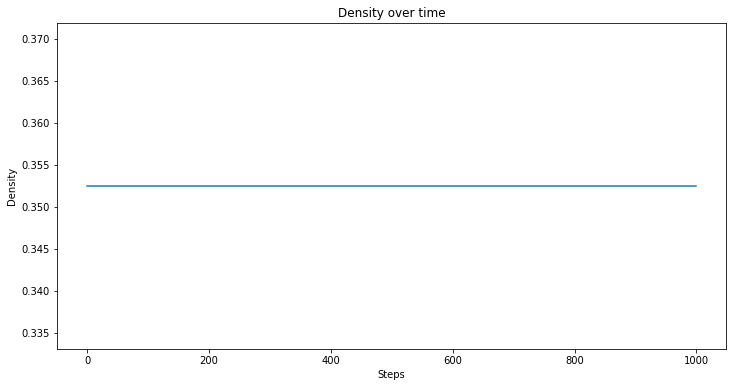

In [9]:
sim = TrafficSimulator(length=100, density=0.35, v_max=5, p_down=0.5)

# initil
sim.initialize()
density = []
t = 1000
for i in range(t):
  sim.step()
  if i >= 970:
    sim.display_1()
  density.append(sim.check_density())

plt.figure(figsize = (12,6))
plt.title("Density over time")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.plot(range(t), density)
plt.show()

··1·0··1000··10·1·1000·10·1···1·00·100·1·0000·00000·1····000·10··100000···10000····2·000000·1··1···1
·2·1·1·0000··0·10·0000·00···2··100·000··10000·00000··1···00·100··000000···00000····0·00000·1··2·1···
·0·0·0·000·1·0·0·1000·10·1····200·100·1·0000·10000·1··1··00·000··00000·1··00000·····100000··1··1·1··
·0··1·1000··10·0·0000·00···2··00·100·1·1000·100000··1··1·00·000··0000·1·1·0000·1····00000·1··1·0··1·
2·1·0·000·1·0·10·000·10·1···1·00·000··10000·000000····20·0·100·1·0000··10·0000···2··0000·1·1··10····
0··10·000·0··10·100·100··1···10·100·1·00·0·100000·1···0·10·000·0·0000··00·0000····1·000·1·1·1·00····
·1·00·00·10··00·000·000····2·0·1000··100·0·000000···2··10·100·1·10000··0·10000·····100·10··1·10·1···
··100·00·0·1·00·00·1000·····10·0000··000··1000000·····20·1000··10000·1·0·0000·1····000·00···100···2·
·300·10·1·1·100·0·10000·····0·10000··00·1·000000·1····0·10000··00000·0··1000·1·1···00·100···000·····
·00·10·10·0·000··10000·1·····100000··0·10·000000···2···100000··0000·1·1·000·1·1·1··00·00·1·

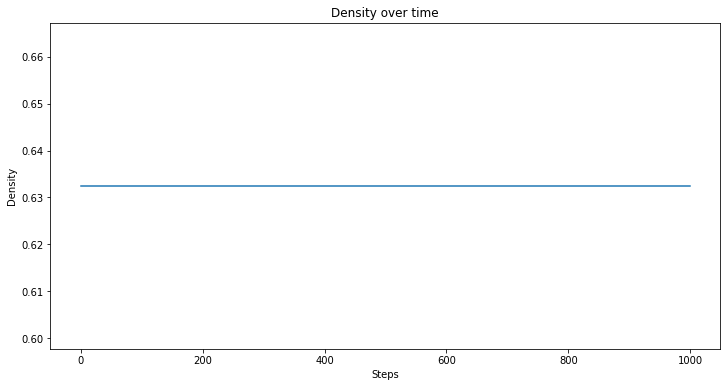

In [10]:
sim = TrafficSimulator(length=100, density=0.65, v_max=5, p_down=0.5)

# initil
sim.initialize()
density = []
t = 1000
for i in range(t):
  sim.step()
  if i >= 970:
    sim.display_1()
  density.append(sim.check_density())

plt.figure(figsize = (12,6))
plt.title("Density over time")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.plot(range(t), density)
plt.show()

In [11]:
sim = TrafficSimulator(length=100, density=0.5, v_max=5, p_down=0.5)

# initil
sim.initialize()
density = []
t = 1000
for i in range(t):
  sim.step()
  if i >= 970:
    sim.display_all()
    print("")

··0·1·10·100····2···2··2······0000·0·00·1··00··1···1··1··1·0··10·100···20··1···000·100·000····2···3·
0···1··0000·10000·1·1········4·10··0·0··1···1··1···0·0··100·1···2··100·0·00·0000···00·00·1·1··2·0·00
·00·1·00·0·1·10··10·0000·····0······30000·100000·1···2···0000·······3·0·0000·000·100···2000·1··0··10
1··1····3·00000·1···0·100··0··0·····1··1000000···0000·100·1000·1··2····2··1·10·0000···10··1·0000·00·

·3·1·100·00·1·····2···2··2····000·10·0·1··200····2··1···2·1·1·0·100·1··00···1··00·100·100·1······3··
0····1·000·100000·0···2·······10·1··1·1···2··1···2·0·0··000··1····200·10·00·000·1··00·0·10···20·0·00
100··100·0··10·1·00·0000······1·····00000·00000·1·1·····30000·······0·0·000·1000·000···000·1·1·0··0·
·1···2··0·0000·1··2··100·1·0··0·······2000000·1··000·1000·0000···2···3···2·100·000·1··0·1·0·0000·00·

30·0·000·0·1·1······2··1····3·000·0·1·1·1·000······2··2·0·0·0·0·000···20·1···1·0·1000·000···2·······
·1····1000·000000·0······3····0·1·1·0··1···1··1···1·1·1·000····2··000·00·00·000···20·10·0

### **2.3. Average car flow with respect to density**

Based on the graph, there are three key findings:
- Based on the figure, the best traffic flow still holds at p = 0.1 for all models (single vs. multi-lane). 
- The multi-lanes models seem to create a better car flow rate, with approximately 0.04 car/step more than a single-lane model (12% increase) at the peak (p = 0.1). Between p = 0.1 and p = 0.5, there is a significant increase in car flow rate from single lane model to 2-lane model, whereas there are only slight increases from 2-lane to 5-lane or 10-lane models. Outside the range [0.1, 0.5], the behaviors are quite similar (as either all car flow freely or traffic jams on all lanes)
- One interesting observation is that: for multi-lane models, the 95% interval seems narrower as the number of lanes increases, which implies multi-lane models are less affected by random initialization. This observation makes sense because more lanes would allow flexible lane-changing, which after the long run, will create balances and adequate car flow on all lanes, which reduce the effect of random initialization. 

In [0]:
# 3 different number of lanes
lanes_values = [2, 5, 10]
# keep track list
track_mean, track_low, track_high = [[] for i in range(len(lanes_values))], [[] for i in range(len(lanes_values))], [[] for i in range(len(lanes_values))]
densities = np.linspace(0, 1, 41)
# running first few steps to avoid effect by random initialization
init_steps = 50
steps = 100
simulations = 30

# looping through each number of lane
for k in range(len(lanes_values)):
  num_lanes = lanes_values[k]
  for p in densities:
    # initialize the mode;
    sim = TrafficSimulator(length=100, density = p, v_max = 5, p_down = 0.5, lanes = num_lanes)
    tracking = []

    # start simulation 
    for i in range(simulations):
      total = 0
      sim.initialize()
      for i in range(steps + init_steps):
        sim.step()
        # only record after the first few steps
        if i >= init_steps:
          total += np.sum(sim.car_pass())
      # take the average
      tracking.append(total/num_lanes/steps)
    # record it into list
    track_mean[k].append(np.mean(tracking, axis = 0))
    track_low[k].append(np.quantile(tracking, 0.05, axis = 0))
    track_high[k].append(np.quantile(tracking, 0.95, axis = 0))

2_lane peak at: p = 0.1
5_lane peak at: p = 0.1
10_lane peak at: p = 0.1


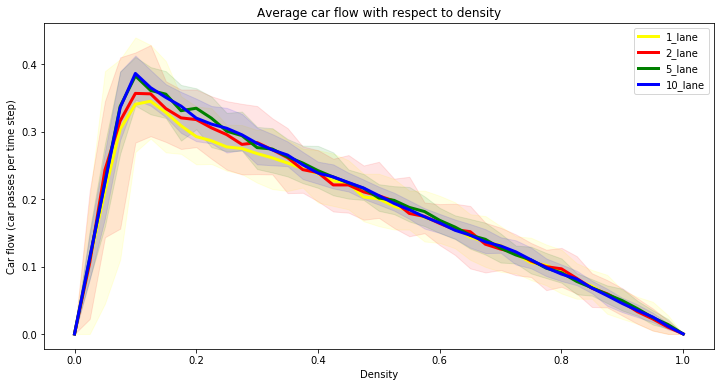

In [13]:
plt.figure(figsize = (12,6))

# plot the single lane to compare
plt.plot(densities, single_lane_mean, label = "1_lane", color = coloring[3], linewidth = 3)
plt.fill_between(densities, single_lane_low, single_lane_high, alpha=0.1, color = coloring[3])

# plot the multi-lanes
for i in range(len(track_mean)):
  print(str(lanes_values[i]) + "_lane peak at: p =", densities[track_mean[i].index(max(track_mean[i]))])
  plt.plot(densities, track_mean[i], label = str(lanes_values[i]) + "_lane", color = coloring[i], linewidth = 3)
  plt.fill_between(densities, track_low[i], track_high[i], alpha=0.1, color = coloring[i])

# multiple lanes - same cars - the value:
multi_same_mean, multi_same_low, multi_same_high = track_mean, track_low, track_high

plt.legend()
plt.title("Average car flow with respect to density")
plt.xlabel("Density")
plt.ylabel("Car flow (car passes per time step)")
plt.show()

## **3. Stretch goal: Good & Bad driver (chaotic model)**

### **3.1. Simulation model**

The traffic rules are similar to the multi-lane model, except each car has a different configuration (instead of all vehicles follow the same rule). 

For each car, I initialize a different slowdown property, different possible max speed, accelerating steps, changing lane property. This model is more complicated as we cannot only store the velocity in the road, but we have to store the whole car because each car has different properties. The p_down also reflects bad drivers as they are more likely to slow down randomly. Also, this model increases the velocity differences between cars (as some cars have different max_speed and different accelerating steps). 


In [0]:
# Each location will be an independent car settings, to depict random driving behavior
class Car(object):
  # few basic parameters
  def __init__(self, v_max = 5, p_down = 0.5, acce = 1, v = 3, p_change = 0.5):
    '''
    acce: the speed up step: some car can move 2 steps at a time
    v_max: each car has different max_speed
    p_down: each car has different probability slowing down
    p_change: each car has different probability changing lanes
    v: current speed
    '''
    self.acce = acce
    self.v_max = v_max
    self.p_down = p_down
    self.v = v
    self.p_change = p_change
  
  # get current speed
  def get_v(self):
    return self.v
  
  # get max speed
  def get_v_max(self):
    return self.v_max

  # get probability slowing down
  def get_p_down(self):
    return self.p_down

  # number of spots can speed up each step
  def get_acce(self):
    return self.acce

  # probability of changing lanes
  def get_p_change(self):
    return self.p_change

  # change the current v
  def change_v(self, new_v):
    self.v = new_v
    return self

In [0]:
class TrafficSimulator(object):
  # initialize the parameters. Only work for multi-lanes  
  def __init__(self, length=100, density=0.1, v_max=5, p_down=0.5, p_change = 1, interactive=False, lanes = 4):
    self.interactive = interactive
    self.length = length
    self.density = density
    self.v_max = v_max
    self.p_down = p_down
    self.p_change = p_change
    # only work for multi lanes
    if lanes <= 1: 
      raise ValueError("Lanes must be larger than 1")
    self.lanes = lanes

    # Arrays for storing the current state and the next state (when we are
    # busy doing a state update).
    self.lane = np.zeros((lanes, self.length))
    self.next_lane = np.zeros((lanes, self.length))

  def initialize(self):
    '''
    This will be called by the interactive pycxsimulator whenever the Reset
    button is clicked.
    '''
    # Set up a random initial state where the fraction of 1s in the array
    # equals the density parameter.
    self.lane = np.array(self.lane)
    self.lane.fill(-1)
    self.lane = self.lane.tolist()

    # looping through each spot
    for x in range(self.lanes):
      for y in range(self.length):
        if RD.random() < self.density:
          # setting the basic parameter for each driver
          # max speed if random, with +- 2 from global cars settings
          car_v_max = RD.randint(self.v_max - 2, self.v_max + 1)
          # probability from uniform dist.
          car_p_down = RD.uniform(0.2, 0.8)
          # possible acceleration step
          car_acc = RD.randint(1, 2)
          # current speed
          car_v = RD.randint(0, car_v_max)
          # probability from uniform dist.
          car_p_change = RD.uniform(0.2, 0.8)
          # setting the car
          self.lane[x][y] = Car(v_max = car_v_max, p_down = car_p_down, acce = car_acc, v = car_v, p_change = car_p_change)
    self.time = 0

  # simple display using string
  def display_1(self):
    print(''.join('·' if x == -1 else str(int(x.get_v())) for x in self.lane[0]))

  def display_all(self):
    for i in range(self.lanes):
      print(''.join('·' if x == -1 else str(int(x.get_v())) for x in self.lane[i]))

  # look ahead check function for the current lane
  # takes in the current lane and current position and output should we stay in lane and best speed can achieve
  def look_ahead_same(self, cur_lane, cur_pos):
    speed = cur_lane[cur_pos].get_v()
    optimal = True
    # each car has different best speed
    n_speed = min(speed + cur_lane[cur_pos].get_acce(), cur_lane[cur_pos].get_v_max())
    for i in range(int(min(speed + cur_lane[cur_pos].get_acce(), cur_lane[cur_pos].get_v_max()))):
      # if there is car ahead -> not optimal
      if cur_lane[(cur_pos + i + 1)%len(cur_lane)] != -1:
        optimal = False
        n_speed = i 
        break
    return optimal, n_speed

  # look ahead check function for the other lane
  # takes in the next lane and current position and output should we stay change lane and best speed can achieve
  def look_ahead_other(self, cur_lane, other_lane, cur_pos):
    speed = cur_lane[cur_pos].get_v()
    optimal = True
    # each car has different best speed
    n_speed = min(speed + cur_lane[cur_pos].get_acce(), cur_lane[cur_pos].get_v_max())
    for i in range(int(min(speed + cur_lane[cur_pos].get_acce(), cur_lane[cur_pos].get_v_max()))):
      # if there is car ahead -> not optimal
      if other_lane[(cur_pos + i + 1)%len(other_lane)] != -1:
        optimal = False
        n_speed = i
        break
    return optimal, n_speed

  # look behind and check function for the other lane
  # takes in the next lane and current position and output can we change lane so that no car behind that can crash us
  def look_behind_other(self, cur_lane, other_lane, cur_pos):
    obstacle = False
    for i in range(self.v_max + 2 + 2):
      # check all path: if there is obstacle: return True
      if other_lane[(cur_pos - i)%len(other_lane)] != -1:
        obstacle = True
    return obstacle


  # to NOT use period lanes (leftmost lane can turn left to go to rightmost lane):
  # a function to output all nearby lanes
  # for edge lane, will do the next lane twice (would change a bit of the result because the probability for edge lanes
  # to change is not p anymore, but  1 - (1-p)^2 = 2p - p^2). 
  def next_lanes(self, cur_lane):
    # leftmost
    if cur_lane == 0:
      return [1,1]
    #rightmost
    elif cur_lane == self.lanes - 1:
      return [self.lanes - 2, self.lanes - 2]
    # left + right
    else:
      return [cur_lane - 1, cur_lane + 1]

  # updating
  def step(self):
      '''
      Update the state of the cellular automaton.
      '''
      n = self.length
      lanes = self.lanes

      # initialize next state
      self.next_lane = np.array(self.next_lane)
      self.next_lane.fill(-1)
      self.next_lane = self.next_lane.tolist()

      # loop through all cars
      for x in range(self.lanes):
        for i in range(self.length):
          # only consider non-empty cells
          if self.lane[x][i] != -1:
            
            # check the same lane first
            v = int(self.lane[x][i].get_v())
            opt_ahead_same, n_v_same = self.look_ahead_same(self.lane[x], i) 

            # check the nextby lanes
            left_lane, right_lane = self.next_lanes(x)

            # optimal status and best speed
            opt_ahead_other_1, n_v_other_1 = self.look_ahead_other(self.lane[x], self.lane[left_lane], i)
            opt_ahead_other_2, n_v_other_2 = self.look_ahead_other(self.lane[x], self.lane[right_lane], i)
            opt_ahead_other_3, n_v_other_3 = self.look_ahead_other(self.lane[x], self.next_lane[left_lane], i)
            opt_ahead_other_4, n_v_other_4 = self.look_ahead_other(self.lane[x], self.next_lane[right_lane], i)

            # check obstacle
            obstacle_1 = self.look_behind_other(self.lane[x], self.lane[left_lane], i)
            obstacle_2 = self.look_behind_other(self.lane[x], self.lane[right_lane], i)
            obstacle_3 = self.look_behind_other(self.lane[x], self.next_lane[left_lane], i)
            obstacle_4 = self.look_behind_other(self.lane[x], self.next_lane[right_lane], i)

            # if moving in same lane is not optimal and we have better option in the left lanes (optimal + no obstacle):
            if opt_ahead_same == False and opt_ahead_other_1 == True and opt_ahead_other_3 == True and obstacle_1 == False and obstacle_3 == False and RD.random() < self.lane[x][i].get_p_change():
              # random slowdown
              if RD.random() < self.lane[x][i].get_p_down() and n_v_other_1 > 0:
                n_v_other_1 -= 1  
              # update lane
              self.next_lane[left_lane][int(i + n_v_other_1)%n] = self.lane[x][i].change_v(n_v_other_1)
            
            # if moving in same lane is not optimal and we have better option in the right lanes (optimal + no obstacle):
            elif opt_ahead_same == False and opt_ahead_other_2 == True and opt_ahead_other_4 == True and obstacle_2 == False and obstacle_4 == False and RD.random() < self.lane[x][i].get_p_change():
              # random slowdown
              if RD.random() < self.lane[x][i].get_p_down() and n_v_other_2 > 0:
                n_v_other_2 -= 1  
              # update lane
              self.next_lane[right_lane][int(i + n_v_other_2)%n] = self.lane[x][i].change_v(n_v_other_2)

            # stay in the same lane
            else:
              # random slowdown
              if RD.random() < self.lane[x][i].get_p_down() and n_v_same > 0:
                n_v_same -= 1
              # updaye
              self.next_lane[x][int(i + n_v_same)%n] = self.lane[x][i].change_v(n_v_same)

      # update by swapping lanes
      for x in range(self.lanes):
        self.lane[x], self.next_lane[x] = self.next_lane[x], self.lane[x]
      self.time += 1

  # count the number of car pass the bar at each step
  # return a list of which lane has a car pass the bar
  def car_pass(self):
    result = []
    # loop through each lane
    for x in range(self.lanes):
      added = False
      for i in range(self.v_max):
        # if there is a car with speed > current position -> it passes the bar
        if self.lane[x][i] != -1 and self.lane[x][i].get_v() > i:
          added = True
          result.append(added)
          break
      if not added: 
        result.append(False)
    return result

  def check_density(self, value=None):
    '''
    The density of cars on the road. Only affects initialization (reset) of
    the simulation. The density must be a value between 0 and 1.
    '''
    return np.mean(np.array(self.lane) != -1)

### **3.2. Check if model runs by showing states of this model over time and checking the density over time**

One key difference is each car having different property. Hence, from the figures below, there are cars with possibly very high p_down, which in case it stucks at the traffic jam and reach its turn to move, it will cost many step before it can move, which will create further traffic jam (thicker) in the latter of the road. This is depicted by bad driver/bad car, where when it stuck in traffic, the engine stops completely and takes some time to restart.  

Also, traffic jams are created by differences in velocity. Hence, some cars with very high speed can be affected by vehicles at low speed. This result is even further reflected in this model comparing to the part-2 multi-lane models. Cars are running with max speed = 6 but then blocked by cars with speed = 4 (because its max speed is 4). This situation reflects the driver behavior: some prefers driving slow and safe, whereas others like driving fast. Hence, more traffic jams (and thicker jam) are created in the new models.

··3·00·1·100···2······3··········3····4····3·0·0·1····2····3·······3···2000··00··1·10·0·10·0·0···2··
3·0·0·1·100··2····3······3···········4···3··10··1·1·······4··2········3000·1·0··20·00·0·00··1·1·····
0·0·0··100··2···3····3······3···········3··20·1·0··1········2··2······0000·0···20·100·0·00··0····3··
0·0··1·000····2····3·····4·····3··········20·1·1·1···2········2···3···0000·0···00·000··10·1···2···1·
0·0····000·······3······5·····5····4······0·1·10···2····3·······2····3000·10···00·00··200···2····3·1
0·0····000···········4·······5····4····4···10·0·1·····3····3········40000·00···00·0·1·00·1····2···10
0··1···00·1···············5·····3····3····30·1·1··2·······4···3·····00000·00···00··1·10·1··2····2·00
·1··1··0·1·1··················4····3····3·00··1··2···3·······3···3··00000·00···0··20·0·1··2···3··100
··1··1··1·1·1·····················4···3·0·0·1··1···2······5·····3··200000·00····1·00··1··2··2···2000
1··1··1·0·0··1······················2·0··1·1··2··2····3········5··2000000·00·····100····2·1

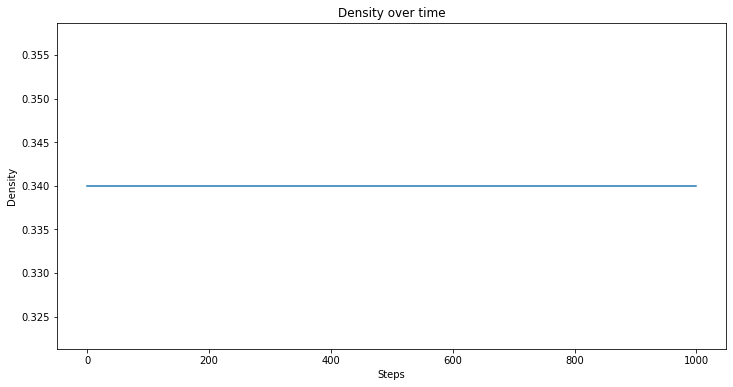

In [23]:
sim = TrafficSimulator(length=100, density=0.350, v_max=5, p_down=0.5)

# initialize
sim.initialize()
density = []
t = 1000
for i in range(t):
  sim.step()
  if i >= 970:
    sim.display_1()
  density.append(sim.check_density())
  
plt.figure(figsize = (12,6))
plt.title("Density over time")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.plot(range(t), density)
plt.show()

0·1·0000·1·10000·00·0000000000·100000··000000000·0··1······100000·1·1·1·100·100·000··0·1·1·1·0000·10
0·0·0000··100000·0·1000000000·1000000··00000000·1··2·1·····00000·1·1·1·1000·000·00·1·0·0··1·10000·00
·1·1000·1·00000·10·0000000000·0000000··00000000···20··1····0000·10··1·1000·100·100··10·0··0·00000·00
·0·0000··10000·10·1000000000·10000000··0000000··2·0··2·1···0000·0·1··1000·1000·00·1·00·0··0·00000·00
10·0000··00000·0·1000000000·10000000·1·0000000···1·1·0···2·0000··1··2000·10000·0·1·100·0··0·0000·10·
0·10000··00000·0·000000000·10000000·10·0000000····10···2··1000·1··1·000·100000·0·0·000··1··10000·00·
·10000·1·00000·0·000000000·0000000·100·000000·1···0·1···1·0000··1··100·1000000·0·0·00·1···200000·00·
·00000··10000·10·000000000·0000000·000·000000···2··1··2·0·0000···1·000·000000·10·0·0·1···300000·10·1
·0000·1·0000·100·000000000·0000000·000·000000····1···20··10000···0·00·1000000·00·0··1··2·000000·0·10
·000·10·0000·000·000000000·000000·1000·00000·1·····2·00··0000·1···100·0000000·0·1·1···2·100

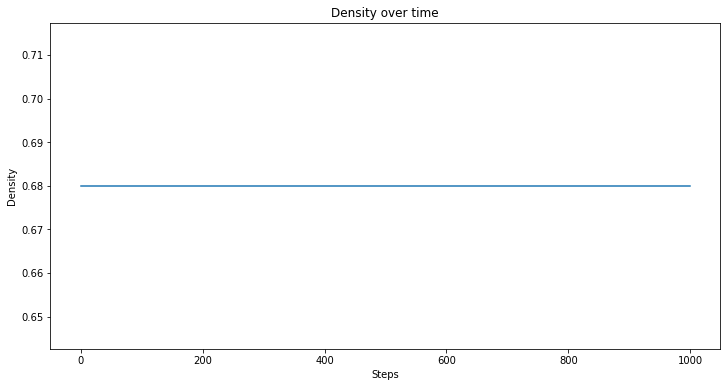

In [24]:
sim = TrafficSimulator(length=100, density=0.650, v_max=5, p_down=0.5)

# initialize
sim.initialize()
density = []
t = 1000
for i in range(t):
  sim.step()
  if i >= 970:
    sim.display_1()
  density.append(sim.check_density())
  
plt.figure(figsize = (12,6))
plt.title("Density over time")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.plot(range(t), density)
plt.show()

In [25]:
sim = TrafficSimulator(length=100, density=0.5, v_max=5, p_down=0.5)

# initialize
sim.initialize()
density = []
t = 1000
for i in range(t):
  sim.step()
  if i >= 970:
    sim.display_all()
  density.append(sim.check_density())

··0·1000000··2·0000··0000··1000·1·100·000·1··0·000·00···1····0·10··1··200·0·00·0·00·00·0·0·1000000·1
00··0000·0·1··1·········0·000·0000··1·1··2······2·····2···00000·00··1······0·0·1···2000···2·00000000
3·····1·000·000······00·00···0··200··1·····2···2···3······30000000··000000·0000·000·100··0000··2····
···2···0·1·100000·1·000·0·00000·1·0·1·100·10·0·1·000·00·100·000·1·0·1·10··2·1··2··2···3···1·00·····2
1·0·0000000···10000··000·1·0000··1000·000··1·0·000·00·····2···10·1··1·00·1·10·1·100·00··1·10000000··
0·1·000·1·1··2·1········0·00·1000··2·1··2···3·····2·····2·00000·0·1··1·····0··1··2·000··2··100000000
···3···1000·00·1·····00·00····1·000····2·····2····3···3···0000000·1·00000·10000·000·00·1·000·1····3·
·2····3·1·100000·1·100·1·100000·0·0·0·00·100··10·00·10·100·1000··10·0·0·1·0···2·1····3··2·0·00······
·1·1000000·1··00000··00·10·000·1·0000·00·1·0··1000·00·······2·0·1·1·0·00·0·00··1000·0·1·0·0000000·1·
·1·1000·0···2·1·1·······0·0·1000··20··1···2····3····2····100000··1·1··1·····1··1·0·000····2

### **3.3. Average car flow with respect to density**

The patterns are similar to the multi-lane model above (more lane - better flow, less uncertainty, less dependent on random initialization). I will focus the analysis on the comparison between the standard multi-lane and this chaotic multi-lane in section 4. 

In [0]:
# 3 different number of lanes
lanes_values = [2, 5, 10]
# keep track list
track_mean, track_low, track_high = [[] for i in range(len(lanes_values))], [[] for i in range(len(lanes_values))], [[] for i in range(len(lanes_values))]
densities = np.linspace(0, 1, 41)
# running first few steps to avoid effect by random initialization
init_steps = 50
steps = 100
simulations = 30

# looping through each number of lane
for k in range(len(lanes_values)):
  num_lanes = lanes_values[k]
  for p in densities:
    # initialize the model
    sim = TrafficSimulator(length=100, density = p, v_max = 5, p_down = 0.5, lanes = num_lanes)
    tracking = []
    
    # start simulation
    for i in range(simulations):
      total = 0
      sim.initialize()
      for i in range(steps + init_steps):
        sim.step()
        # only record after the first few steps
        if i >= init_steps:
          total += np.sum(sim.car_pass())
      # take the average
      tracking.append(total/num_lanes/steps)
    # record into list
    track_mean[k].append(np.mean(tracking, axis = 0))
    track_low[k].append(np.quantile(tracking, 0.05, axis = 0))
    track_high[k].append(np.quantile(tracking, 0.95, axis = 0))

2_lane peak at: p = 0.2
5_lane peak at: p = 0.17500000000000002
10_lane peak at: p = 0.17500000000000002


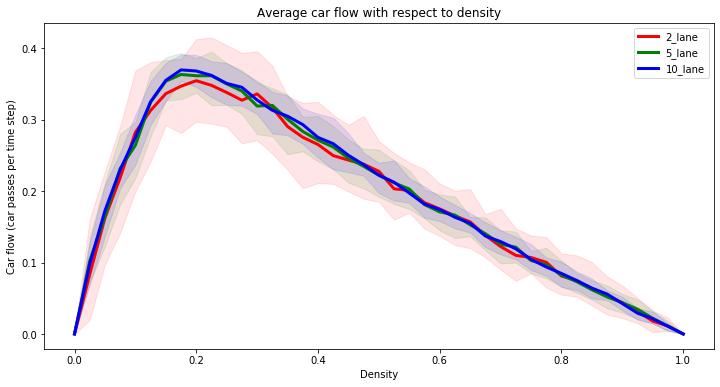

In [27]:
plt.figure(figsize = (12,6))
# plot the multi-lanes
for i in range(len(track_mean)):
  print(str(lanes_values[i]) + "_lane peak at: p =", densities[track_mean[i].index(max(track_mean[i]))])
  plt.plot(densities, track_mean[i], label = str(lanes_values[i]) + "_lane", color = coloring[i], linewidth = 3)
  plt.fill_between(densities, track_low[i], track_high[i], alpha=0.1, color = coloring[i])

# multiple lanes - different cars - the value:
multi_diff_mean, multi_diff_low, multi_diff_high = track_mean, track_low, track_high

plt.legend()
plt.title("Average car flow with respect to density")
plt.xlabel("Density")
plt.ylabel("Car flow (car passes per time step)")
plt.show()

## **4. Conclusions**
**How much more traffic can flow through a 2-lane road compared to a 1-lane road at the same traffic density? What about roads with more than 2 lanes? Either model 3 or more lanes and report on your results, or predict how much larger the traffic flow through a 3+ lane road will be compared to a 1-lane road at the same traffic density.**

At p = 0.1 (peak of traffic flow), the 2-lane model can hold an additional 4% compared to the single-lane model. However, the 5-lane model can hold up to 11% increases to the single-lane model. The traffic flow for the 2-lane model and 3+ lane model is better than the single lane, with less dependence on the initial configuration. This result is demonstrated by the resulting line plus the narrower 95% interval, indicating the more certainty, or in the simulation case, less prone to the initial configuration. The model is flexibly adaptable to all number of lanes; hence, further testing out is feasible given more computing power. (The simulation here takes 1.5h to run each section - already with Colab free GPU). In conclusion, the multi-lane model can hold more traffic (more lane with the same density each lane), and better traffic flow. The 2-lane model only has a slight increase, whereas the 5-lane has significant increase of 11%.

**How applicable is this model to traffic in Buenos Aires (BA)?**

This model is quite reflective of traffic in BA because most vehicles are cars and have similar behavior. For BA, the small roads are usually single-lane, which is identical to section 1. Also, for bigger ways, BA has massive highways with 3+ lanes (some have five lanes), which is applicable for section 2. The results are also similar to what perceived in real life: backward traffic jams. BA traffic can be better depicts by the chaotic model, where each car has different behaviors. Finally, for the next step, to add more real-life components, I suggest adding traffic lights and intersections (as those two are among the reasons slowing down the traffic). This simulation is representative of highway situations.


**Comparison between different multi-lane models (standard vs chaotic). What do your results imply about how self-driving cars should be programmed?**

Interestingly, the chaotic version with the multi-lane is only peaked when density = 0.2, which implies it works better with a higher density road. The main reason is the max_speed component and the accelerating factor. 

First, each car has its max speed, which on average, less than the preset v_max. Call a random vehicle with slow speed A. This means is a fast car (B) can speed up and pass A, no traffic jam would occur (as traffic jam is from the negative velocity difference between the car in front and at the back). 

Second, half of the cars have accelerating step = 2, which makes them accelerate faster, making the traffic flow easier to increase. 

With all such advantages, but the maximum traffic flow is not higher than of the standard model. 

This result leads to a possible suggestion for self-driving cars: same behaviors and chaotic behaviors have its benefits: the standard model avoids noises and unexpected scenarios, whereas the chaotic model allows for freedom depends on the environment. Hence, the self-driving car should be an adaptive system on the environment: instead of having fixed behaviors, cars should accelerate/decelerate strategically. Furthermore, a possible benefit of self-driving cars is the chance of communicating with other cars, which might lead to better planning and coordination between systems, rather than each car as an independent component. 

**Next steps**

I will add traffic lights, intersections turn, more noises in drivers' behaviors, simulate car accidents, and related obstacles. Also, I am very interested in having the system of coordinate vehicles (cars communicating to achieve the best outcome on average). These suggestions are all worth exploring.

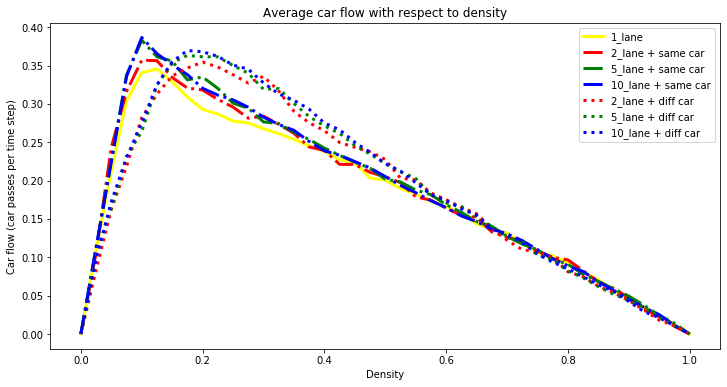

In [28]:
plt.figure(figsize = (12,6))

# plot the single lane to compare
plt.plot(densities, single_lane_mean, label = "1_lane", color = coloring[3], linewidth = 3)

# plot the multi-lanes + same cars
for i in range(len(multi_same_mean)):
  plt.plot(densities, multi_same_mean[i], label = str(lanes_values[i]) + "_lane + same car", color = coloring[i], linewidth = 3, linestyle = "-.")

# plot the multi-lanes + diff cars
for i in range(len(multi_diff_mean)):
  plt.plot(densities, multi_diff_mean[i], label = str(lanes_values[i]) + "_lane + diff car", color = coloring[i], linewidth = 3, linestyle = ":")

plt.legend()
plt.title("Average car flow with respect to density")
plt.xlabel("Density")
plt.ylabel("Car flow (car passes per time step)")
plt.show()